Table of contents

<h1>Import and preprocessing</h1>

In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score


df = pd.read_csv('filtered_property_location_clean.csv', delimiter=';')

#List of columns to drop
columns_to_drop = ['wealthtax_canton','wealthtax_municipality','longitude','latitude','incometax_canton','incometax_municipality','ListingId','LocationId','YearBuilt','Timestamp', 'Availability','AdditionalCost','NetPrice', 'PropertyAdditionalFeaturesId','Vendor', 'street', 'zip','PropertyDescription','bfs_number','municipality',]

#Drop the specified columns from df_encoded_corrected_final
df= df.drop(columns=columns_to_drop)

#Lets find out how many unique values are present in each column

for value in df:
    print('For {},{} unique values present'.format(value,df[value].nunique()))

For Rooms,24 unique values present
For SquareMeter,265 unique values present
For Floor,32 unique values present
For ObjectType,20 unique values present
For Price,1518 unique values present
For Canton,26 unique values present
For population_density,777 unique values present
For public_transport_count,26 unique values present
For supermarket_count,19 unique values present
For foodandbeverage_count,147 unique values present
For Price_per_m2,5506 unique values present


<H1>Codierung mit neuer Variante bearbeiten!</h1>

In [233]:
# Create a new DataFrame with reset index
df_reset = df.reset_index(drop=True)

# Apply One-Hot-Encoding to the canton column

df_canton_encoded = pd.get_dummies(df['Canton'])

#print(df_canton_encoded)

# Explicitly convert the One-Hot-Encoding columns to int
df_caton_encoded = df_canton_encoded.astype(int)

# Concatenate the original DataFrame without the canton column and the result of the One-Hot-Encoding
df = pd.concat([df.drop('Canton', axis=1), df_caton_encoded], axis=1)


# Create a new DataFrame with reset index
df_reset = df.reset_index(drop=True)

# Apply One-Hot-Encoding to the canton column

df_objectType_encoded = pd.get_dummies(df['ObjectType'])

#print(df_objectType_encoded)

# Explicitly convert the One-Hot-Encoding columns to int
df_objectType_encoded = df_objectType_encoded.astype(int)

# Concatenate the original DataFrame without the canton column and the result of the One-Hot-Encoding
df = pd.concat([df.drop('ObjectType', axis=1), df_objectType_encoded], axis=1)


if 'Floor' in df.columns:
    df['Floor'] = df['Floor'].replace('EG', 0)
    df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')
    # Entfernen der Zeilen, in denen 'Floor' NaN ist
    data = df.dropna(subset=['Floor'])
    # Filtere die Zeilen, bei denen 'Floor' kleiner oder gleich 10 ist
    # Zähle die Anzahl der entfernten Zeilen
    rows_removed = data[data['Floor'] > 10]
    rows_removed_count = rows_removed.shape[0]

    # Zeige die Anzahl der entfernten Zeilen an
    print(f'Anzahl der entfernten Zeilen: {rows_removed_count}')



# Apply OneHotEncoder to the 'Canton' column
#encoder = OneHotEncoder()
#canton_encoded = encoder.fit_transform(df[['Canton']]).toarray()
#canton_encoded_df = pd.DataFrame(canton_encoded, columns=encoder.get_feature_names_out(['Canton']))

# Concatenate the encoded canton columns with the original dataframe
#df = pd.concat([df, canton_encoded_df], axis=1)



# Drop the original 'Canton' column
#df = df.drop('Canton', axis=1)

# Display the new dataframe with encoded 'Canton' column
#print(df.head())
    
# Lösche die Daten mit NaN-Werten in der Spalte 'population_density'
df = df.dropna(subset=['population_density','Floor'])
    
# Identifiziere die Anzahl der NaN-Werte in jeder Spalte
nan_counts = df.isna().sum()

print("Hello world")

# Zeige die Spalten mit der Anzahl der NaN-Werte an
print("Anzahl der NaN-Werte in jeder Spalte:")
print(nan_counts)




df.to_clipboard()

Anzahl der entfernten Zeilen: 149
Hello world
Anzahl der NaN-Werte in jeder Spalte:
Rooms                     0
SquareMeter               0
Floor                     0
Price                     0
population_density        0
public_transport_count    0
supermarket_count         0
foodandbeverage_count     0
Price_per_m2              0
ag                        0
ai                        0
ar                        0
be                        0
bl                        0
bs                        0
fr                        0
ge                        0
gl                        0
gr                        0
ju                        0
lu                        0
ne                        0
nw                        0
ow                        0
sg                        0
sh                        0
so                        0
sz                        0
tg                        0
ti                        0
ur                        0
vd                        0
vs                  

<h1>Split data and train </h1>

<H1>XGBoost noch implementieren!</h1>

In [234]:
# X(Independent variables) and y(target variables)
X = df.drop(columns=['Price', 'Price_per_m2'])
y = df['Price'].values

print(X)
print(y)

#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Optional: Zeige die Formen der resultierenden Arrays an
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

      Rooms  SquareMeter  Floor  population_density  public_transport_count  \
0       2.5         93.0    1.0               468.0                       1   
1       2.5         62.0    2.0               437.0                       5   
2       2.0         58.0    3.0              1999.0                       6   
4       2.5         50.0   99.0               491.0                       1   
5       3.5         80.0    2.0               468.0                       3   
...     ...          ...    ...                 ...                     ...   
8855    9.5        220.0    5.0             12811.0                      19   
8856    2.5         52.0    3.0             12811.0                       8   
8857    2.5         52.0    3.0             12811.0                       8   
8859    1.5         40.0    5.0             12811.0                       9   
8860    1.5         39.0    5.0             12811.0                       9   

      supermarket_count  foodandbeverage_count  ag 

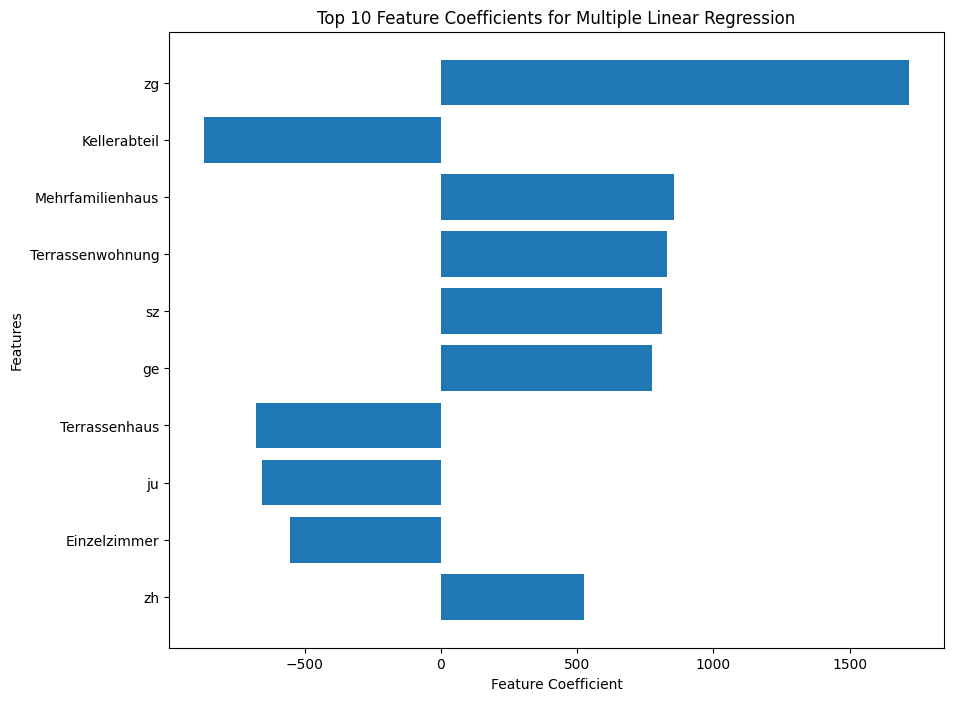

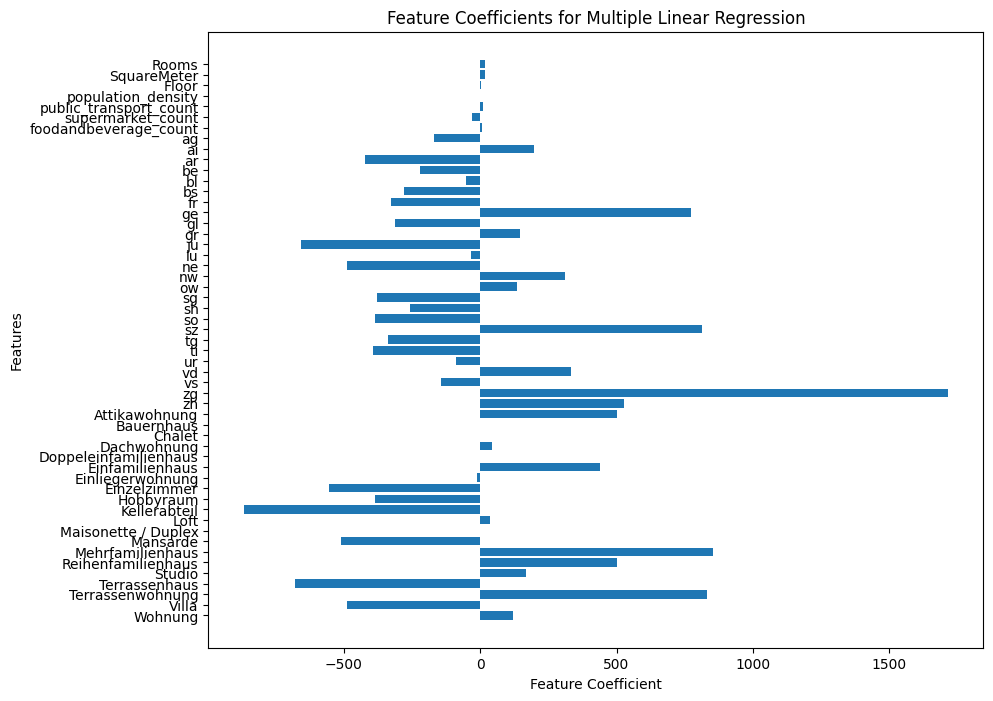

In [235]:
# Speichere die Spaltennamen
feature_names = X.columns

# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_score = mlr.score(X_test, y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(y_test, pred_mlr)


# Extrahiere die Koeffizienten des Modells
coefficients = mlr.coef_

# Erstelle einen DataFrame für die Feature-Koeffizienten
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sortiere die Features nach dem absoluten Wert der Koeffizienten und wähle die Top 10 aus
top_features = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index).head(10)

# Plot der Feature-Koeffizienten für die Top 10 Features
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel("Feature Coefficient")
plt.ylabel("Features")
plt.title("Top 10 Feature Coefficients for Multiple Linear Regression")
plt.gca().invert_yaxis()  # Die wichtigsten Features oben anzeigen
plt.show()



# Plot der Feature-Koeffizienten für alle Features
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Feature Coefficient")
plt.ylabel("Features")
plt.title("Feature Coefficients for Multiple Linear Regression")
plt.gca().invert_yaxis()  # Die wichtigsten Features oben anzeigen
plt.show()


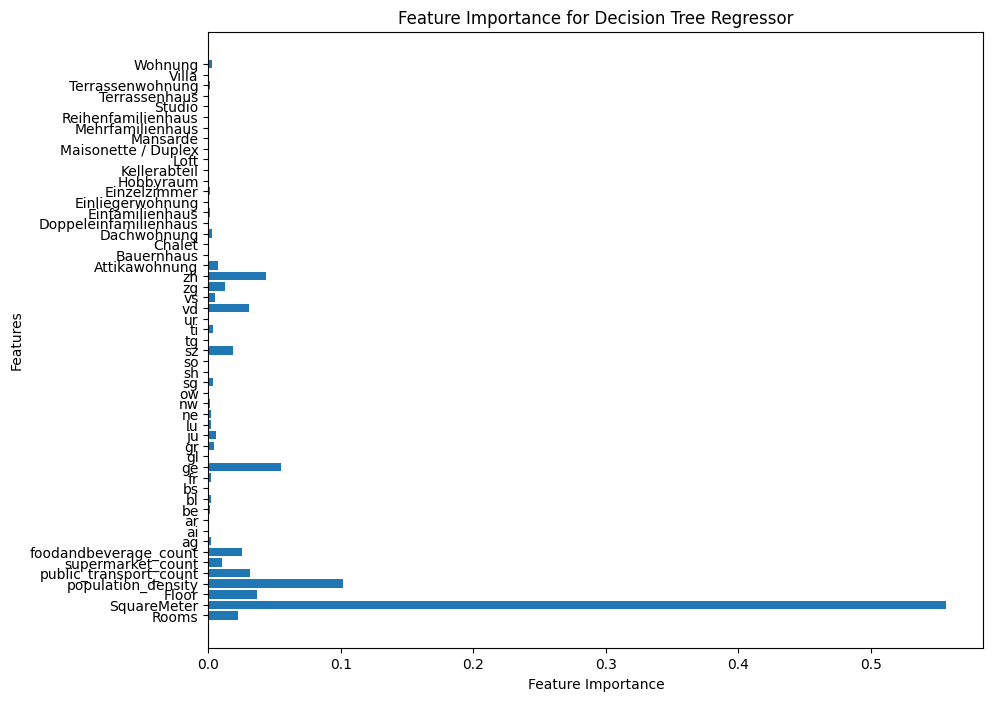

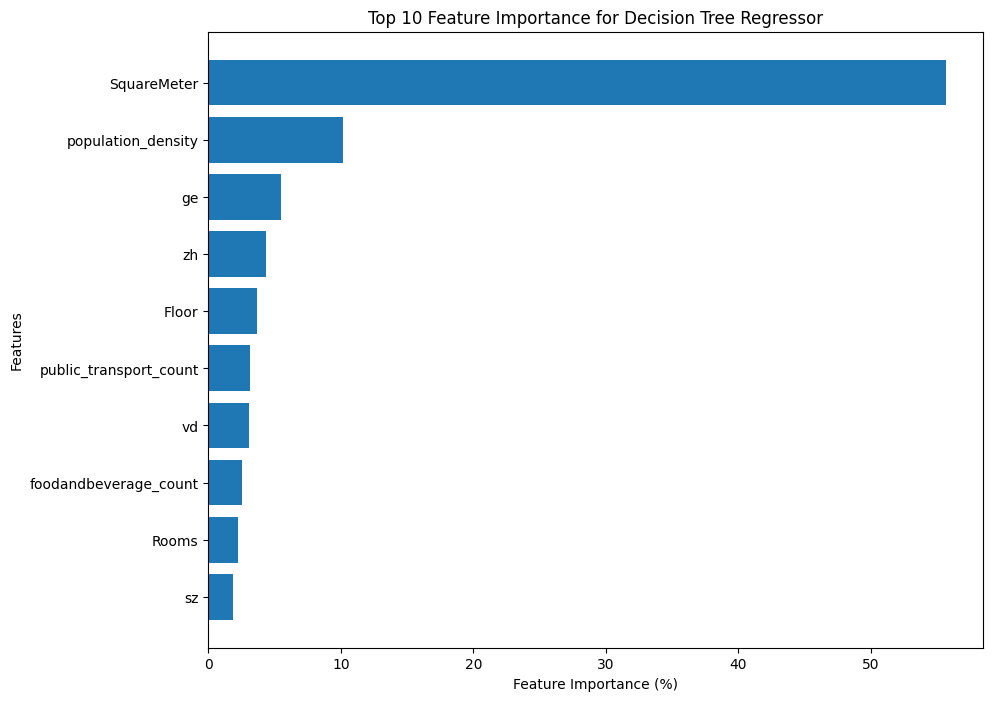

In [236]:
from sklearn.tree import DecisionTreeRegressor

# Speichere die Spaltennamen
feature_names = X.columns

tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

# Feature-Importances für den Decision Tree Regressor
tree_importances = tr_regressor.feature_importances_

# Plot der Feature-Wichtigkeiten für Decision Tree
plt.figure(figsize=(10, 8))
plt.barh(feature_names, tree_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Decision Tree Regressor")
plt.show()


# Feature-Importances für den Decision Tree Regressor
tree_importances = tr_regressor.feature_importances_

# Erstelle einen DataFrame für die Feature-Wichtigkeiten
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': tree_importances
})

# Sortiere die Features nach Wichtigkeit und wähle die Top 10 aus
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Konvertiere die Wichtigkeiten in Prozent
top_features['Importance'] = top_features['Importance'] * 100

# Plot der Feature-Wichtigkeiten für die Top 10 Features
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Feature Importance (%)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance for Decision Tree Regressor")
plt.gca().invert_yaxis()  # Die wichtigste Feature oben anzeigen
plt.show()



Wichtigkeiten der Features für den Random Forest Regressor:
Rooms: 0.04719587412250259
SquareMeter: 0.5090606970911605
Floor: 0.03155492991382599
population_density: 0.12962960286839983
public_transport_count: 0.03539456701342282
supermarket_count: 0.01612144384138751
foodandbeverage_count: 0.034628873056696846
ag: 0.0018401071341571469
ai: 0.00011855779771248823
ar: 0.00028813312852189255
be: 0.002666524408620173
bl: 0.001576515679062011
bs: 0.002391391482600146
fr: 0.0012270900417986135
ge: 0.04984956186797596
gl: 0.00019737288759545695
gr: 0.004535784740772755
ju: 0.004961182673376424
lu: 0.0027018664302038056
ne: 0.0016343589742843687
nw: 0.0008310074993559636
ow: 8.865116246546116e-05
sg: 0.002453954498370402
sh: 0.00039880601458846534
so: 0.0007984258711326486
sz: 0.010992496303852474
tg: 0.0007567791100620561
ti: 0.004223902102880412
ur: 8.846662231622706e-05
vd: 0.02638281256774406
vs: 0.0020238477686274348
zg: 0.012512275610304342
zh: 0.03920648054254199
Attikawohnung: 0.00498

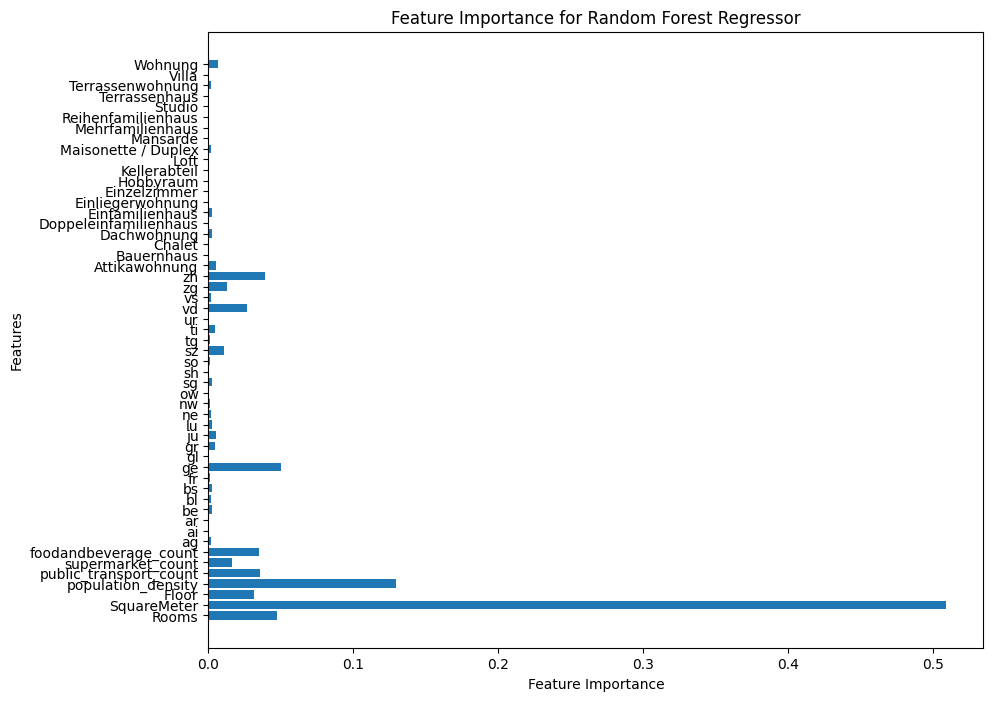

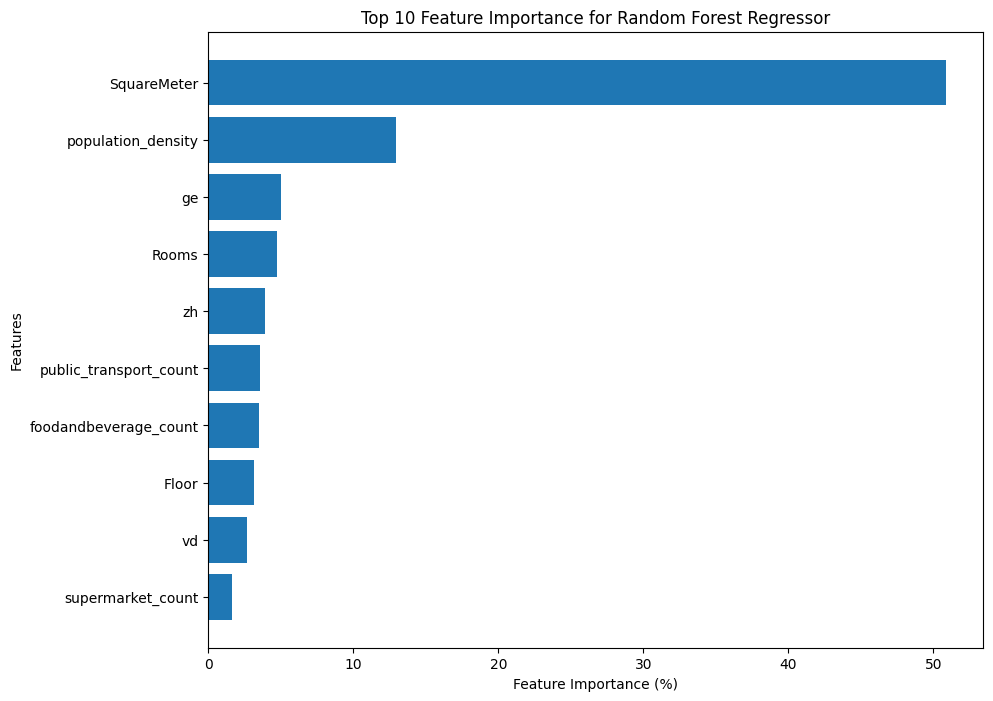

In [237]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

# Feature-Importances für den Random Forest Regressor
forest_importances = rf_regressor.feature_importances_
print("Wichtigkeiten der Features für den Random Forest Regressor:")
for feature, importance in zip(X.columns, forest_importances):
    print(f"{feature}: {importance}")


# Plot der Feature-Wichtigkeiten für Random Forest
plt.figure(figsize=(10, 8))
plt.barh(feature_names, forest_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

# Feature-Importances für den Random Forest Regressor
forest_importances = rf_regressor.feature_importances_

# Erstelle einen DataFrame für die Feature-Wichtigkeiten
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': forest_importances
})

# Sortiere die Features nach Wichtigkeit und wähle die Top 10 aus
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Konvertiere die Wichtigkeiten in Prozent
top_features['Importance'] = top_features['Importance'] * 100

# Plot der Feature-Wichtigkeiten für die Top 10 Features
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Feature Importance (%)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance for Random Forest Regressor")
plt.gca().invert_yaxis()  # Die wichtigste Feature oben anzeigen
plt.show()





Wichtigkeiten der Features für das XGBoost-Modell:
Rooms: 0.006571295205503702
SquareMeter: 0.08160899579524994
Floor: 0.004483484197407961
population_density: 0.02314327470958233
public_transport_count: 0.008816723711788654
supermarket_count: 0.005622740834951401
foodandbeverage_count: 0.008457855321466923
ag: 0.0036897582467645407
ai: 0.0019156871130689979
ar: 0.0068018450401723385
be: 0.00391323771327734
bl: 0.008130978792905807
bs: 0.03487353026866913
fr: 0.017738591879606247
ge: 0.16991771757602692
gl: 0.0021731893066316843
gr: 0.03834148123860359
ju: 0.047539614140987396
lu: 0.00913824699819088
ne: 0.01843411847949028
nw: 0.006235976703464985
ow: 0.0011314911535009742
sg: 0.01830078661441803
sh: 0.001773780444636941
so: 0.01856297254562378
sz: 0.04270763695240021
tg: 0.007963448762893677
ti: 0.02258167415857315
ur: 0.0014768661931157112
vd: 0.11298409104347229
vs: 0.007448697462677956
zg: 0.06779485195875168
zh: 0.08835811913013458
Attikawohnung: 0.02080414816737175
Bauernhaus: 0

<Figure size 1000x800 with 0 Axes>

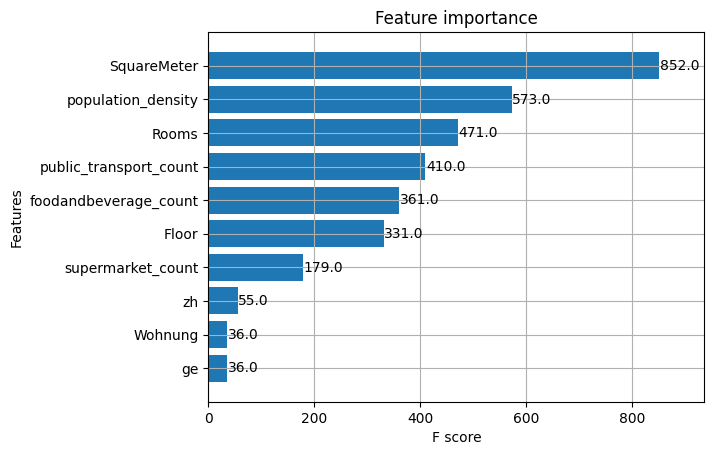

0.729092150712464


In [238]:
# Trainiere ein XGBoost-Modell
import xgboost

xgb_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=0)
xgb_model.fit(X_train, y_train)
xgb_score = xgb_model.score(X_test, y_test)

# Feature-Namen
feature_names = X.columns

# Wichtigkeiten der Features für das XGBoost-Modell
xgb_importances = xgb_model.feature_importances_

# Berechne den Explained Variance Score für XGBoost
expl_xgb = explained_variance_score(y_test, xgb_model.predict(X_test))

print("Wichtigkeiten der Features für das XGBoost-Modell:")
for feature, importance in zip(feature_names, xgb_importances):
    print(f"{feature}: {importance}")

# Plot der Feature-Wichtigkeiten
plt.figure(figsize=(10, 8))
xgboost.plot_importance(xgb_model, max_num_features=10, height=0.8)
plt.show()

print(xgb_score)

Modell bewerten

Schritt 7: Modell verwenden für Vorhersagen

In [239]:

print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))
print("XGBoost Regression Model Score is ", round(xgb_score * 100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression','XGB Boost'],
                            'Score':[mlr_score,decision_score,rf_score,xgb_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf,expl_xgb]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  63
Decision tree  Regression Model Score is  52
Random Forest Regression Model Score is  70
XGBoost Regression Model Score is  73


,Model,Score,Explained Variance Score
3,XGB Boost,0.729092,0.729316
2,Random forest Regression,0.702982,0.565565
0,Multiple Linear Regression,0.627599,0.627659
1,Decision Tree,0.517141,0.504441
